# Programming Machine Learning Lab
# Exercise 7

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_7.xxx"**
1. Complete all your tasks and then do a clean run before generating the final PDF. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


### Part 1

**Distance Metrics**

In this exercise, we will learn about distance metrics. A natural distance measure for sequences is the so-called edit distance or *Levenshtein distance*. You can read up more about it here (https://en.wikipedia.org/wiki/Levenshtein_distance). 

Your task is to implement a function called levenshtein_dist, that takes two input strings and calculates the distance between them. Ultimately, you need to find the Levenshtein distance between **"random_1.txt"** and **"random_2.txt"**. The resultant distance of the two texts should be between 40-50.

In [1]:
### Write your code here
def levenshtein_dist(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Initialize a matrix to store the distances between prefixes of str1 and str2
    matrix = [[0 for _ in range(len_str2)] for _ in range(len_str1)]

    # Initialize the first row and column with values from 0 to len_str1 and len_str2
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j

    # Fill in the matrix
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,      # Deletion
                matrix[i][j - 1] + 1,      # Insertion
                matrix[i - 1][j - 1] + cost  # Substitution
            )

    # The bottom-right cell contains the Levenshtein distance
    return matrix[len_str1 - 1][len_str2 - 1]

# Read the contents of the files
with open("random_1.txt", "r") as file1, open("random_2.txt", "r") as file2:
    content1 = file1.read()
    content2 = file2.read()

# Calculate the Levenshtein distance between the two texts
distance = levenshtein_dist(content1, content2)

print(f"Levenshtein distance between random_1.txt and random_2.txt: {distance}")


Levenshtein distance between random_1.txt and random_2.txt: 46


**Minkowski Metric**

We will now implement the Manhattan, Euclidian and Chebyshev distance metrics as defined below

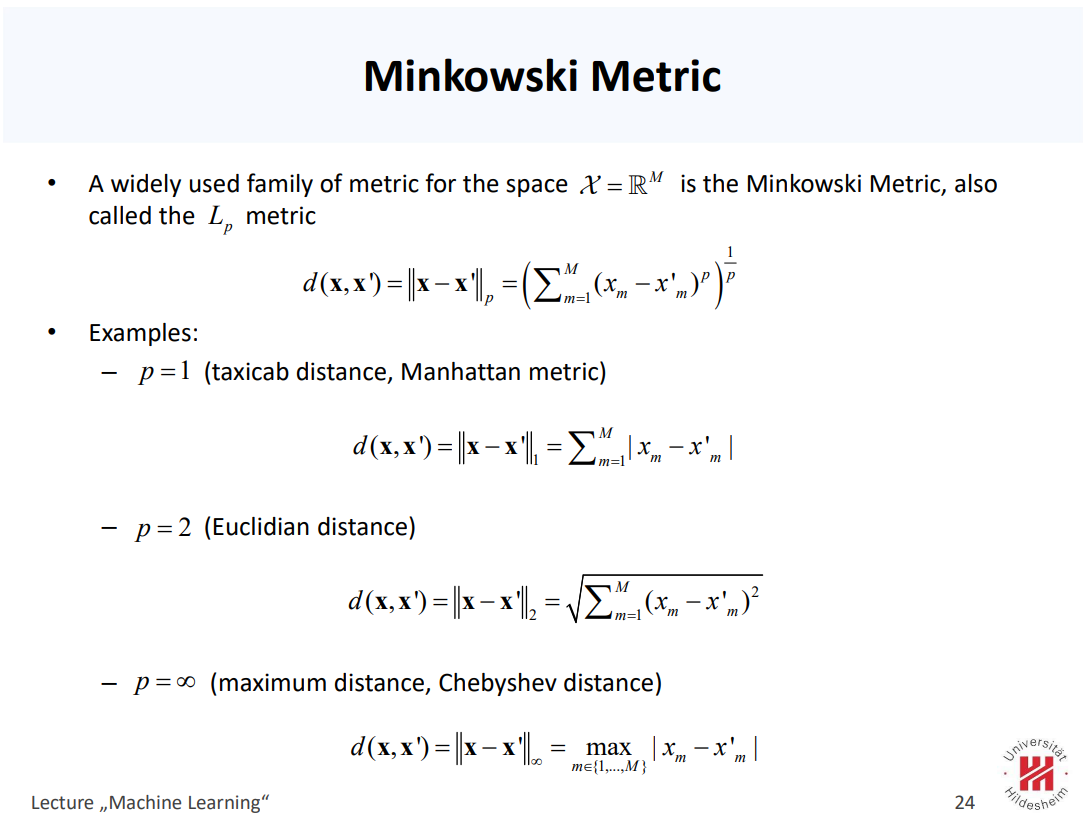

In [2]:
### Write your code here
import numpy as np

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2))

# Given arrays
X_1 = np.array([1, 3, 4])
X_2 = np.array([2, 4, 1])

# Calculate distances
manhattan_dist = manhattan_distance(X_1, X_2)
euclidean_dist = euclidean_distance(X_1, X_2)
chebyshev_dist = chebyshev_distance(X_1, X_2)

# Display the results
print(f"Manhattan Distance: {manhattan_dist}")
print(f"Euclidean Distance: {euclidean_dist}")
print(f"Chebyshev Distance: {chebyshev_dist}")

# manhattan_dist(X_1,X_2) = 5
# euclidian_dist(X_1,X_2) = 3.32
# chebyshev_dist(X_1,X_2) = 3


Manhattan Distance: 5
Euclidean Distance: 3.3166247903554
Chebyshev Distance: 3


### Part 2

**K-Nearest Neighbor Classifier**

For this part, you need to implement a K-Nearest Neighbor Classifier, the basic algorithm is given by:

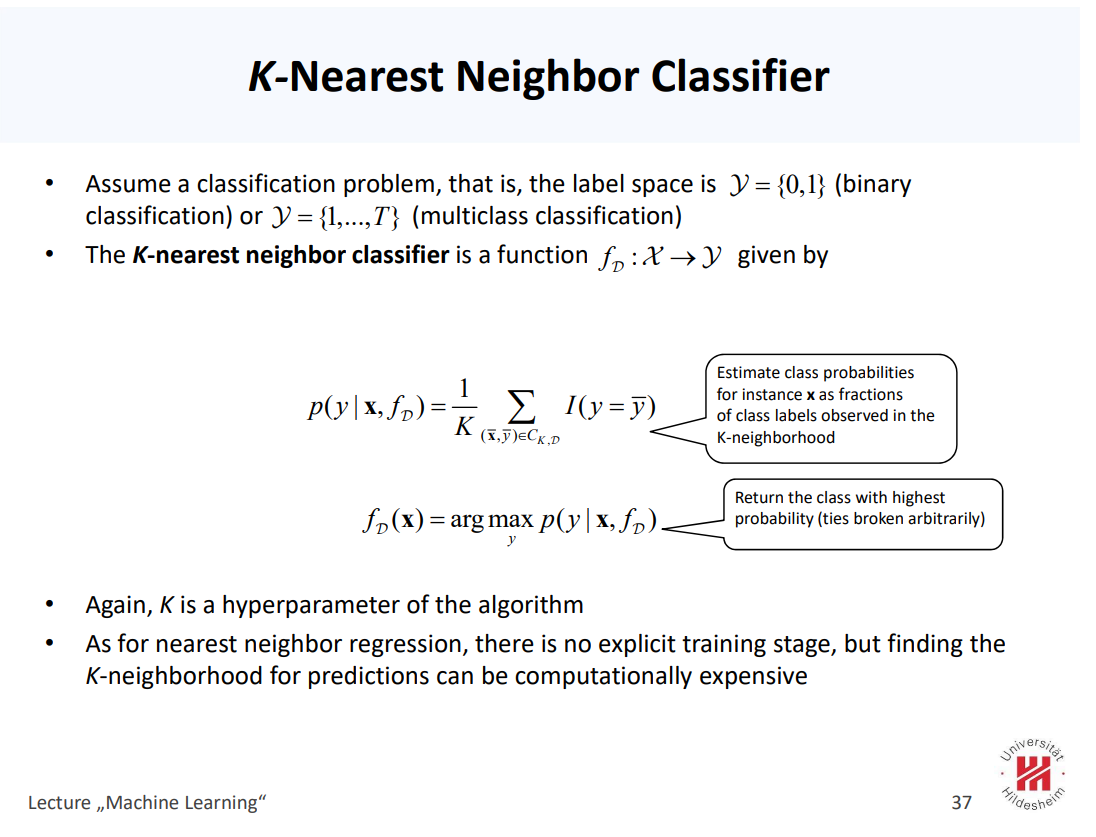


You need to use the iris dataset (from sklearn) for this task.
- Divide the dataset into train, validation and test using 70-20-10 ratio.
- Perform standard scaling of the dataset. *(Hint: store the original mean and std of features for later use)*
- The algorithm should work with Manhattan, Euclidian and Chebyshev distance metrics
- Do a hyperparameter search over different values of *K* and the distance metrics using the train and validation datasets. 
- Once the best model is found (compare models based on f1-score), report the test results for that model (precision, recall and f1-score). **Note you need to create scoring functions from scartch and NOT use the pre-defined functions from sklearn.**
- Train your model once more by combining both train and validation datasets for training (with the best hyperparameters). Compare the results with the model trained on just train split. Comment if there's a difference.

**Note: You are only allowed to use sklearn to read the iris dataset. The rest of the code should be in Numpy**

In [1]:
### Write your code here

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Divide the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Standard scaling of the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to calculate distances
def calculate_distance(X_train, X, metric='euclidean'):
    if metric == 'manhattan':
        return np.sum(np.abs(X_train - X), axis=1)
    elif metric == 'euclidean':
        return np.sqrt(np.sum((X_train - X)**2, axis=1))
    elif metric == 'chebyshev':
        return np.max(np.abs(X_train - X), axis=1)

# Function to predict labels
def predict_labels(X_train, y_train, X, k, metric='euclidean'):
    distances = calculate_distance(X_train, X, metric)
    sorted_indices = np.argsort(distances)
    k_nearest_labels = y_train[sorted_indices[:k]]
    unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

# Function to evaluate model performance
def evaluate_model(X_train, y_train, X_val, y_val, k, metric='euclidean'):
    predictions = np.zeros_like(y_val)
    for i in range(len(X_val)):
        predictions[i] = predict_labels(X_train, y_train, X_val[i], k, metric)
    
    return predictions

# Function to calculate precision, recall, and F1-score
def calculate_metrics(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    precision = true_positives / (true_positives + false_positives + 1e-10)
    recall = true_positives / (true_positives + false_negatives + 1e-10)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

    return precision, recall, f1_score

# Hyperparameter search
best_metric = None
best_k = None
best_f1_score = 0

for metric in ['manhattan', 'euclidean', 'chebyshev']:
    for k in range(2, 10):
        y_pred_val = evaluate_model(X_train_scaled, y_train, X_val_scaled, y_val, k, metric)
        precision, recall, f1_score = calculate_metrics(y_val, y_pred_val)
        if f1_score >= best_f1_score:
            best_f1_score = f1_score
            best_metric = metric
            best_k = k

# Report the best hyperparameters
print(f"Best Hyperparameters: K={best_k}, Distance Metric={best_metric}")

# Test the model on the test set
y_pred_test = evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, best_k, best_metric)

# Calculate precision, recall, and F1-score on the test set
precision_test, recall_test, f1_score_test = calculate_metrics(y_test, y_pred_test)

# Display the results
print(f"Test Results - Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_score_test}")

# Train the model on the combined train and validation sets
X_train_combined = np.concatenate((X_train_scaled, X_val_scaled))
y_train_combined = np.concatenate((y_train, y_val))

# Evaluate the model on the combined set
y_pred_combined = evaluate_model(X_train_combined, y_train_combined, X_test_scaled, y_test, best_k, best_metric)

# Calculate precision, recall, and F1-score on the combined set
precision_combined, recall_combined, f1_score_combined = calculate_metrics(y_test, y_pred_combined)

# Display the results
print(f"Combined Train+Validation Results - Precision: {precision_combined}, Recall: {recall_combined}, F1-score: {f1_score_combined}")


Best Hyperparameters: K=2, Distance Metric=chebyshev
Test Results - Precision: 0.9999999999857143, Recall: 0.9999999999857143, F1-score: 0.9999999999357143
Combined Train+Validation Results - Precision: 0.9999999999857143, Recall: 0.9999999999857143, F1-score: 0.9999999999357143


**Visualization**

You need to visualize the decision boundaries for the best k-NN classifier for all combination of features. As there are 4 features, we would get 6 plots. (F1xF2, F1xF3, F1xF4, F2xF3, F2xF4 and F3xF4). The plots should look like the given example. Please appropriately label the axes of all figures.

*You need to visualize the data in the **original feature space**, for this purpose, you need to descale the data after classifying the gridmesh* $$z ={x_{scaled} \times {\text{std}(x_{orig})}+\text{mean}(x_{orig})}$$

Color scheme for all 6 plots should be consistent.

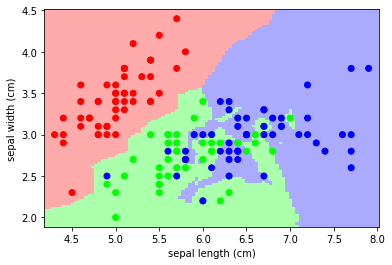

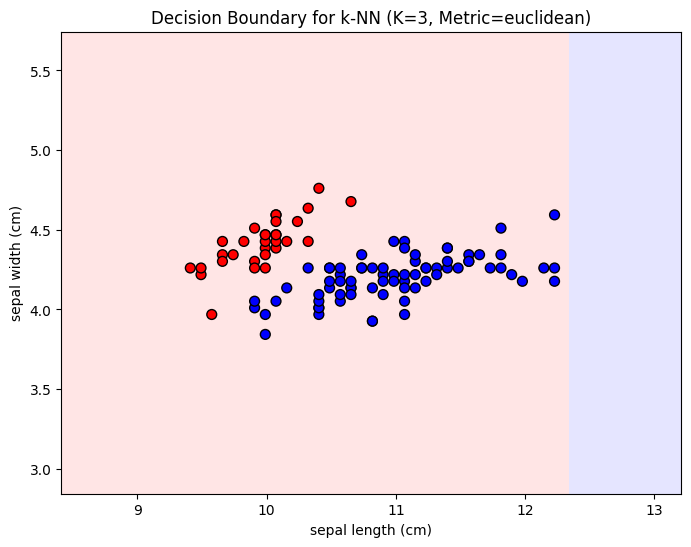

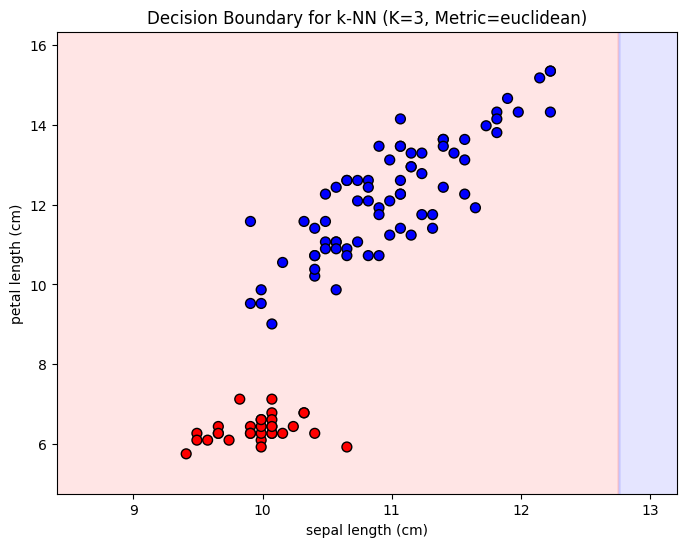

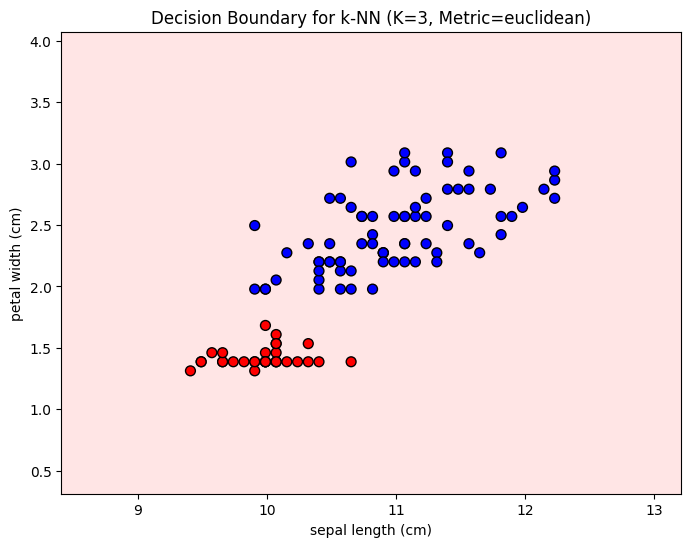

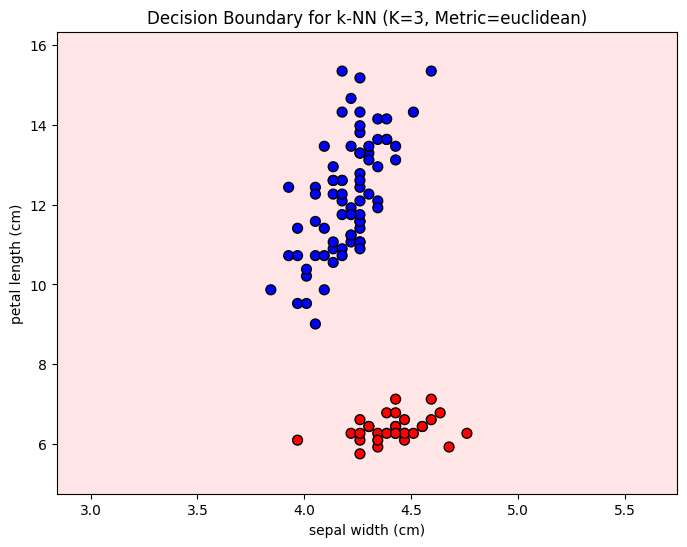

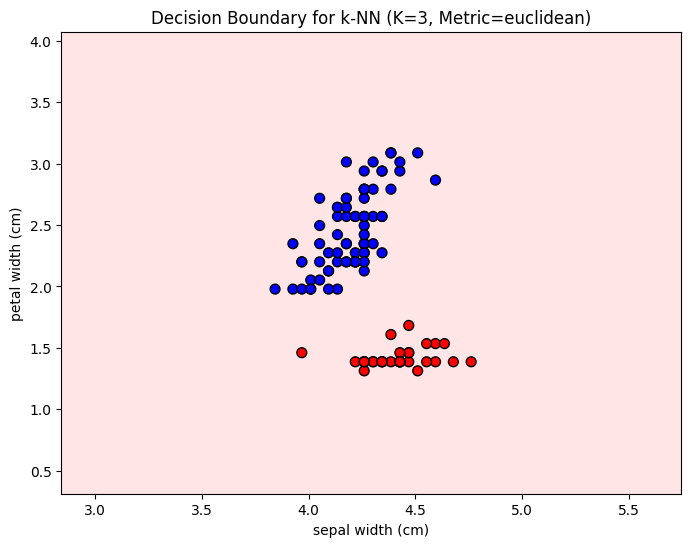

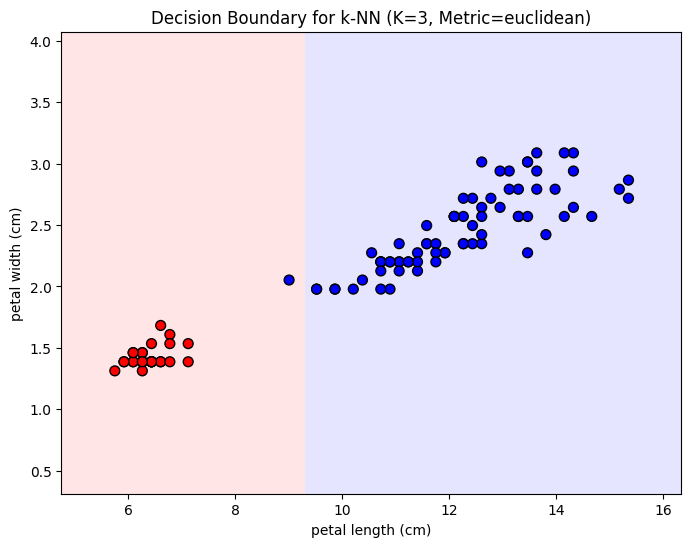

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

best_k = 3
best_metric = 'euclidean'

# Function to descale data
def descale_data(X_scaled, mean, std):
    return X_scaled * std + mean

X_train = descale_data(X_train, scaler.mean_, scaler.scale_)

# Function to visualize decision boundaries
def visualize_decision_boundary(X_train, y_train, best_k, best_metric, feature1, feature2):
    # Extract the two features
    idx_feature1 = iris.feature_names.index(feature1)
    idx_feature2 = iris.feature_names.index(feature2)
    X_train_subset = X_train[:, [idx_feature1, idx_feature2]]
    # Create a meshgrid for visualization
    h = .02  # step size in the mesh
    x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
    y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Classify each point in the meshgrid
    meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = evaluate_model(X_train[:, [idx_feature1, idx_feature2]], y_train, meshgrid_points[:,0],  meshgrid_points[:,1], best_k, best_metric)

    # Reshape the result to match the shape of the meshgrid
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

    # Plot the data points
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=50)
    
    # Set labels and title
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Decision Boundary for k-NN (K={best_k}, Metric={best_metric})')

    # Show the plot
    plt.show()

# Visualize decision boundaries for all combinations of features
features = iris.feature_names
for i in range(len(features) - 1):
    for j in range(i + 1, len(features)):
        visualize_decision_boundary(X_train, y_train, best_k, best_metric, features[i], features[j])


### Part 3

**Over-vs-Underfitting**

In this part, we will use Polynomial regression to understand how over and under-fitting works. Using the below given code, you need to generate multiple datasets. The sizes of the datasets should be $[10,20,40,80,160,320,640]$.

- Create a Polynomial Feature Transformer. This is a preprocessing step that simply takes in a value (x) and returns its higher powers upto the degree D (i.e. $[x^1,x^2,x^3,...,x^D]$).
- Transform the x features using the Polynomial Feature Transformer. 
- Now, if we fit a linear regressor using these transformed features, we are in essence creating a polynomial regressor. For this, create an object class Linear_Regressor that can be fitted on arbitary number of features. You can use any algorithm to create this class (**sklearn is not allowed**). Use MSE loss for this. *(Remember not to forget the bias term)*
- Perform Hyper-parameter tunning using this Linear_Regressor. You are to try out different degree models for all datasets. (Use at least 10 different degree models ranging between 1 and 20). Compare the results on validation data to find the best degree models for each size of dataset. 

In [29]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

def func(x):
    return 2*x + 0.25*np.sin(8 * np.pi * x) + 0.5*np.sin(3 * np.pi * x) \
        - 3*(x**3) + 0.5*(x**5) + 5 

def get_data(size):
    rng = np.random.RandomState(2023)
    x_train = rng.uniform(0.0, 1.0, size)
    x_train = np.sort(x_train)
    y_train = func(x_train) + rng.normal(scale=0.1, size=size)  

    x_val = rng.uniform(0.0, 1.0, int(0.2*size))
    x_val = np.sort(x_val)
    y_val = func(x_val) + rng.normal(scale=0.05, size=int(0.2*size))

    return x_train, y_train, x_val, y_val

x_test = np.linspace(0, 1., 200)
y_test =  func(x_test)


# Polynomial Feature Transformer
class PolynomialFeatureTransformer:
    def __init__(self, degree):
        self.degree = degree

    def transform(self, x):
        return np.array([x ** d for d in range(1, self.degree + 1)]).T

# Linear Regressor
class LinearRegressor:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        train_loss = 0
        for epoch in range(self.epochs):
            y_pred = X @ self.weights + self.bias
            mse = mean_squared_error(y_pred, y)
            train_loss += mse
            error = y_pred - y
            self.weights -= self.lr * (2 * X.T @ error) / len(y)
            self.bias -= self.lr * 2 * np.sum(error) / len(y)
        return train_loss/self.epochs

    def predict(self, X):
        return X @ self.weights + self.bias

# Hyperparameter tuning
degrees = list(range(1, 21))
dataset_sizes = [10, 20, 40, 80, 160, 320, 640]
best_degrees = {}

for size in dataset_sizes:
    x_train, y_train, x_val, y_val = get_data(size)

    best_degree = None
    best_mse = float('inf')
    train_losses = []
    valid_losses = []
    test_losses = []
    
    for degree in degrees:
        # Transform features
        transformer = PolynomialFeatureTransformer(degree)
        X_train_transformed = transformer.transform(x_train)
        X_val_transformed = transformer.transform(x_val)

        # Train linear regressor
        regressor = LinearRegressor()
        train_loss = regressor.fit(X_train_transformed, y_train)
        train_losses.append(train_loss)

        # Make predictions on validation set
        y_val_pred = regressor.predict(X_val_transformed)
        # Calculate MSE on validation set
        mse = mean_squared_error(y_val, y_val_pred)
        valid_losses.append(mse)
        
        # test 
        X_test_transformed = transformer.transform(x_test)
        test_mse = mean_squared_error(y_test, regressor.predict(X_test_transformed))
        test_losses.append(test_mse)
        
        # Update best degree if the current model is better
        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            

    # Store the best degree for the current dataset size
    best_degrees[size] = {
        'bestDegree': best_degree,
        'train_losses': train_losses,
        'test_losses': test_losses,
        'valid_losses': valid_losses
    }

# Display the best degrees for each dataset size
for size, degree in best_degrees.items():
    print(f"Best Degree for Dataset Size {size}: {degree['bestDegree']}")


Best Degree for Dataset Size 10: 4
Best Degree for Dataset Size 20: 5
Best Degree for Dataset Size 40: 2
Best Degree for Dataset Size 80: 4
Best Degree for Dataset Size 160: 20
Best Degree for Dataset Size 320: 3
Best Degree for Dataset Size 640: 3


**Visualization**

- Plot the train/val/test MSE losses for each degree model per data-size. (This would be one plot per data size).
- Visualize the test results of all these different models vs data sizes. (This should be a single plot).
- Comment on how the degree hyperparameter changes as data size is increased. Also create a visualization to show the best degree model for each datasize. (This should be a single plot). 

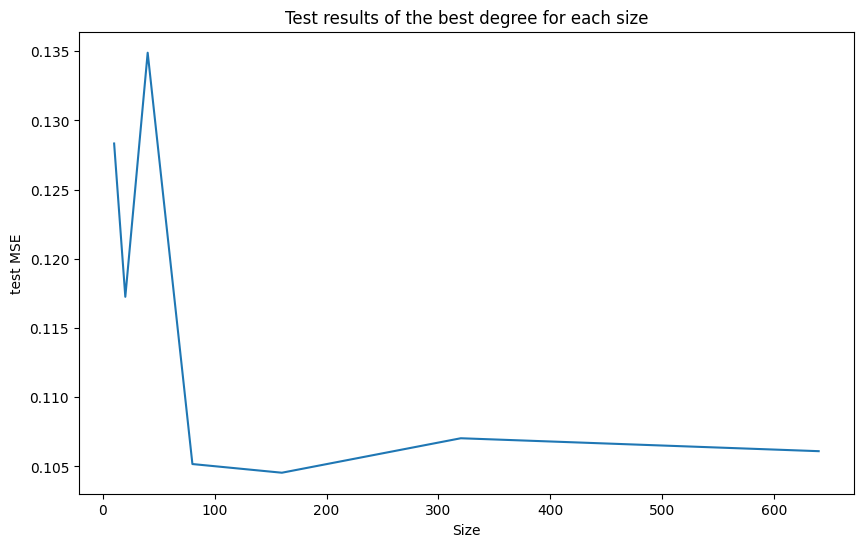

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, [best_degrees[x]['test_losses'][best_degrees[x]['bestDegree']-1] for x in best_degrees])
plt.title('Test results of the best degree for each size')
plt.xlabel('Size')
plt.ylabel('test MSE')
plt.show()

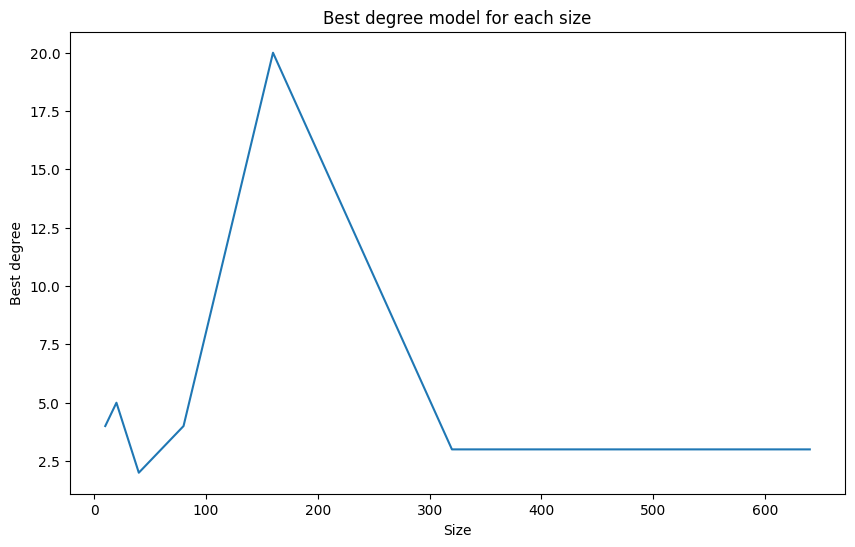

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, [best_degrees[x]['bestDegree'] for x in best_degrees])
plt.title('Best degree model for each size')
plt.xlabel('Size')
plt.ylabel('Best degree')
plt.show()

seems like no trend here...
I might be wrong though...
waiting for the solution...

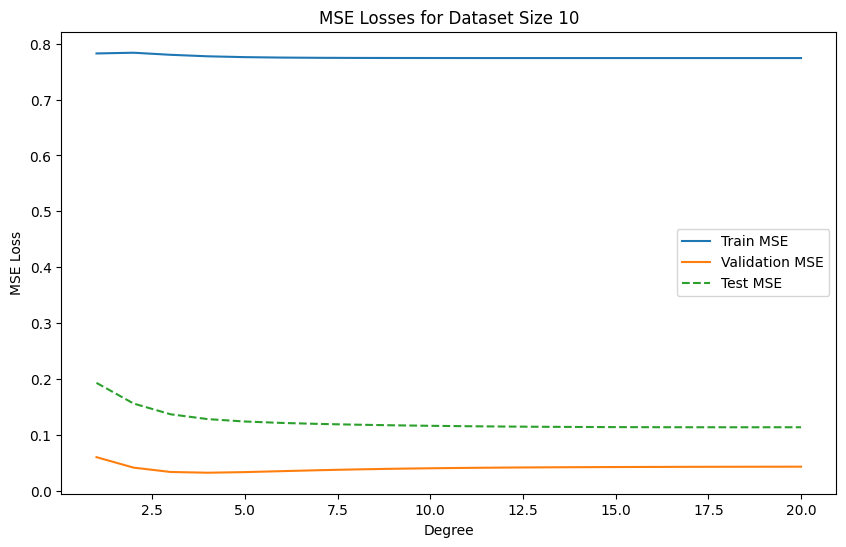

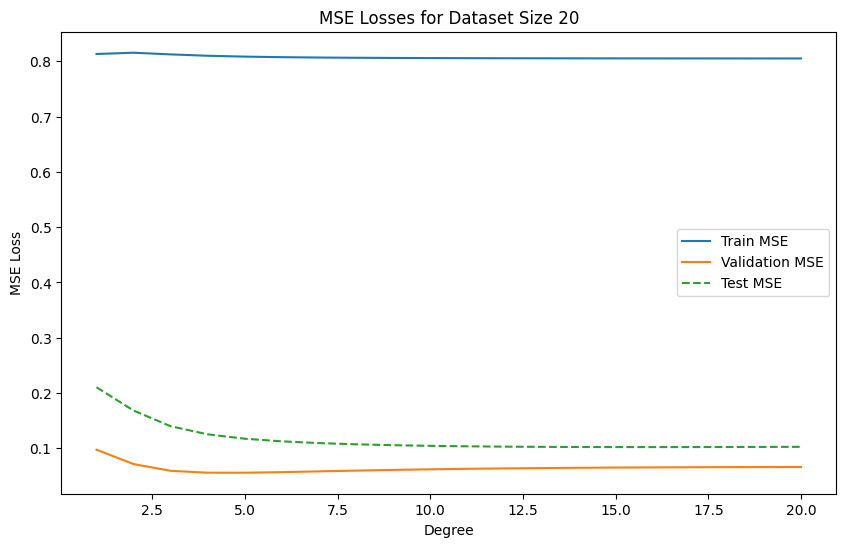

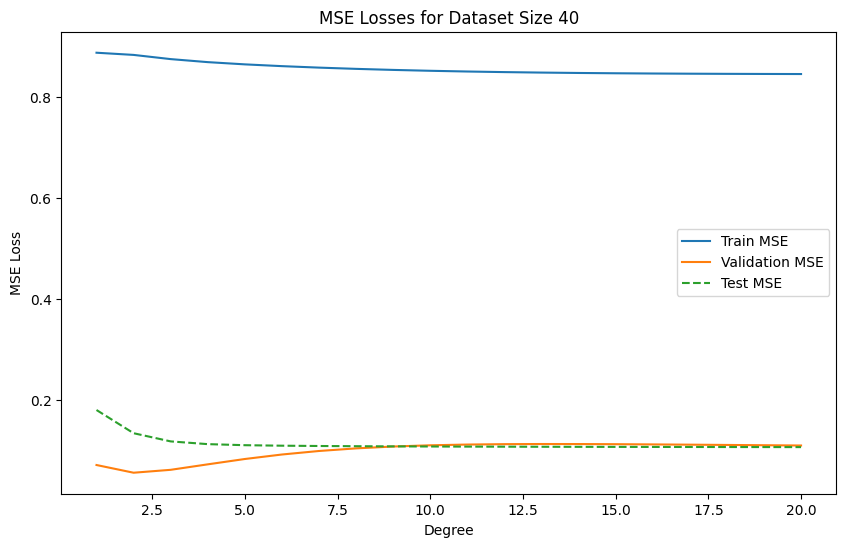

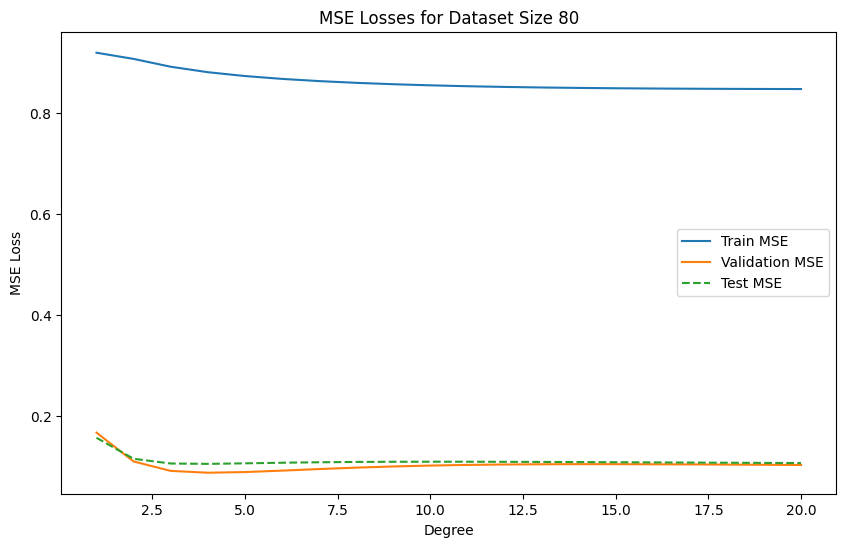

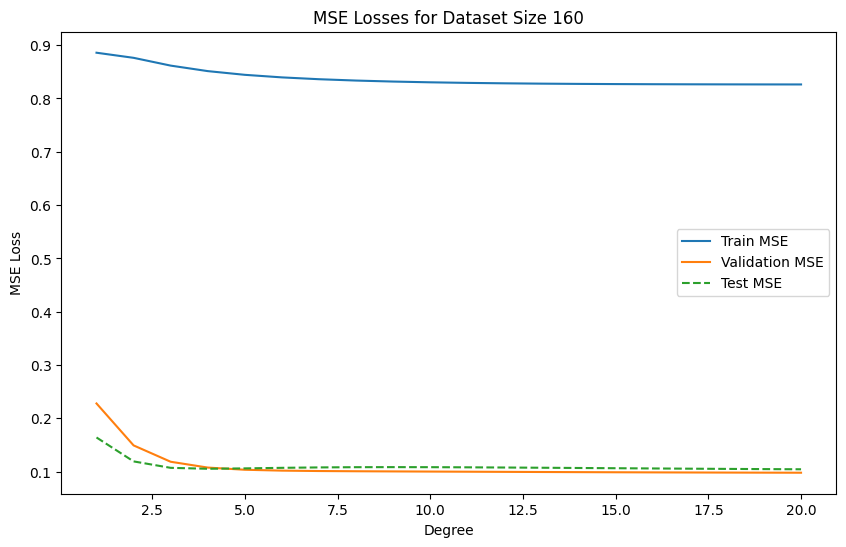

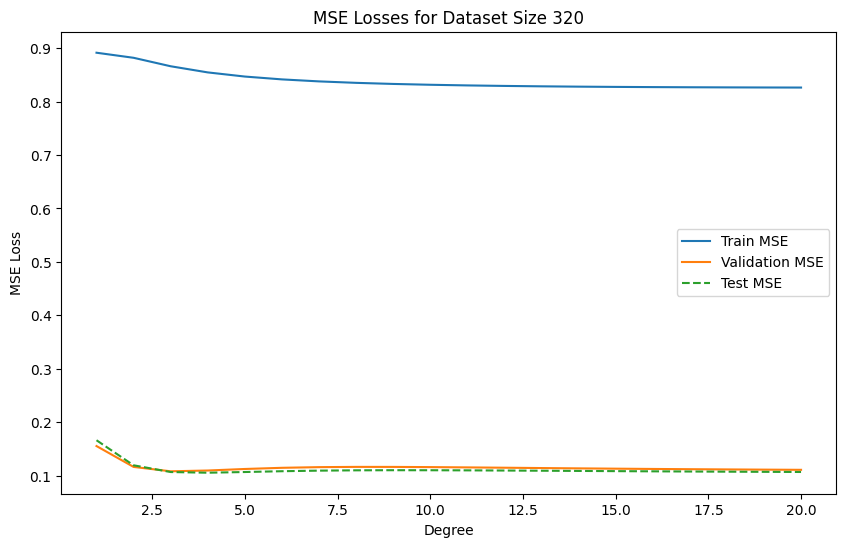

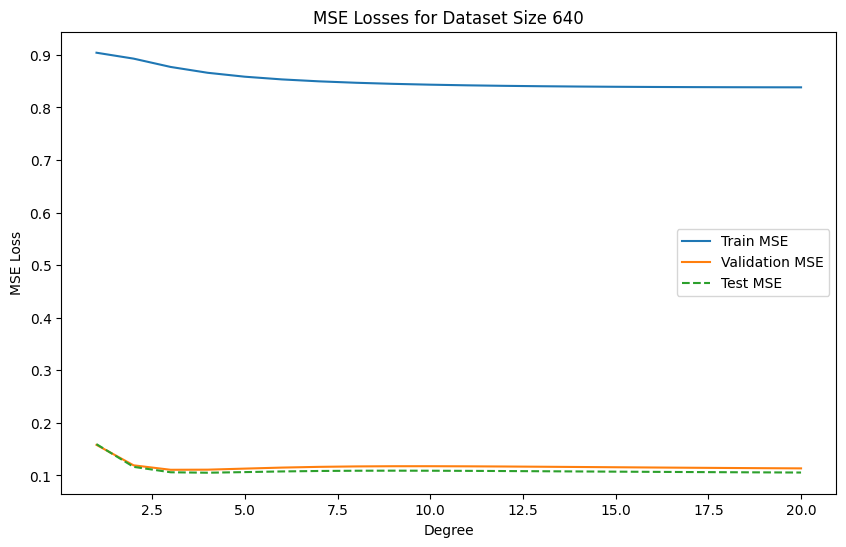

In [30]:
### Write your code here
import matplotlib.pyplot as plt

def plot_mse_losses(x, y_train, y_val, y_test, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_train, label='Train MSE')
    plt.plot(x, y_val, label='Validation MSE')
    plt.plot(x, y_test, label='Test MSE', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

for size in dataset_sizes:
    plot_mse_losses(degrees, best_degrees[size]['train_losses'], best_degrees[size]['valid_losses'], best_degrees[size]['test_losses'], f'MSE Losses for Dataset Size {size}')


**Visualization Continued**

Plot the predictions for the best degree model for each dataset. 
- Properly label the axes.
- Include the MSE loss and datasize in the title of the figure.
-  Add a legend as well.

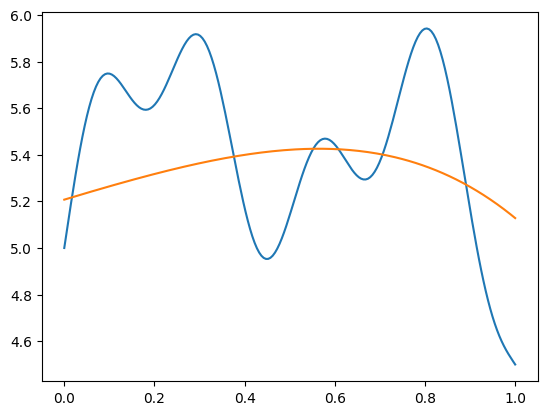

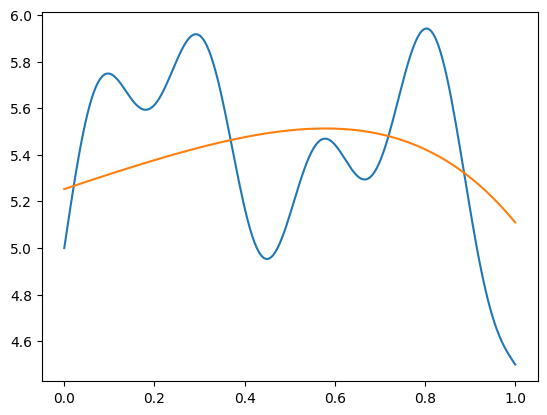

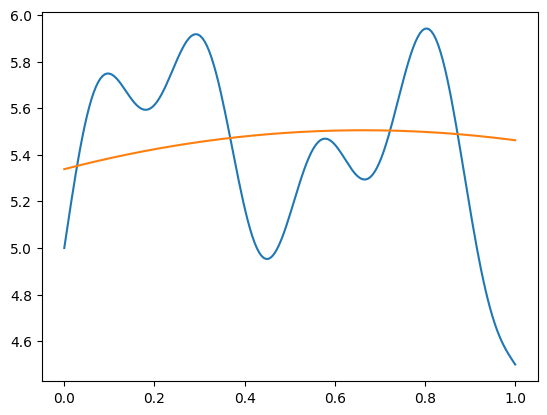

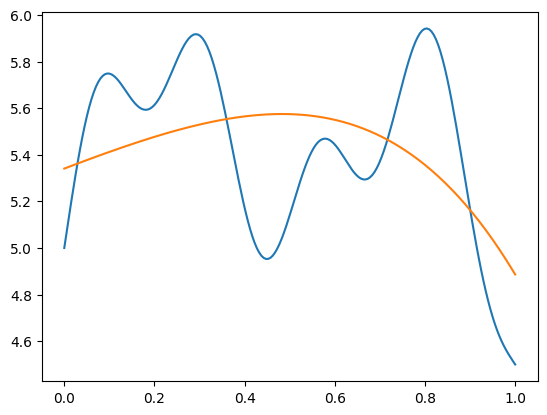

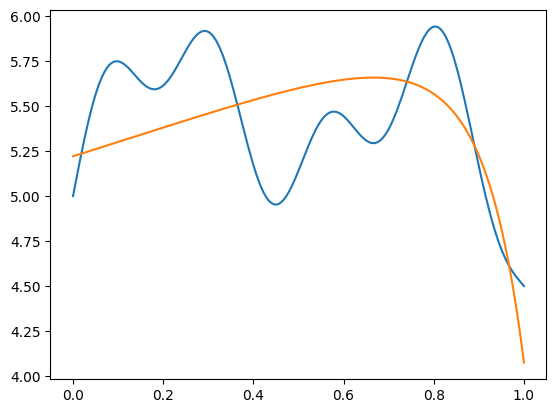

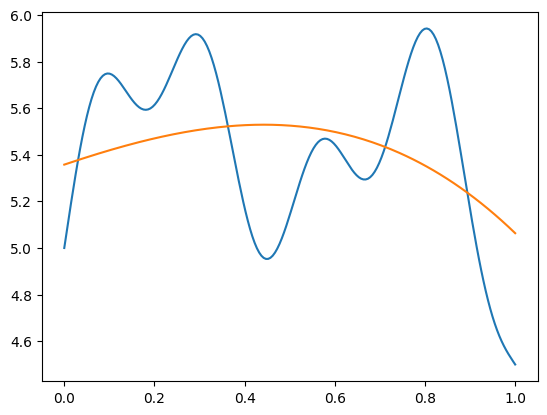

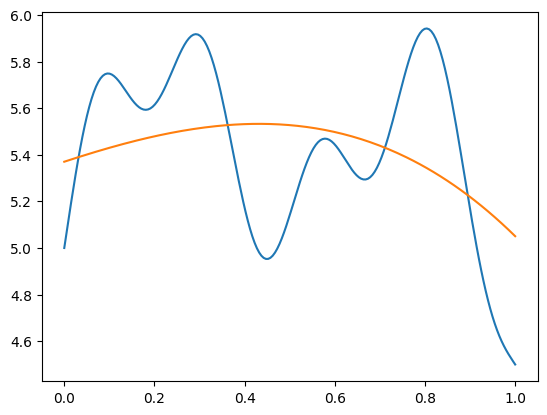

In [39]:
for ii in [10,20,40,80,160,320,640]:
    x_train, y_train, x_val, y_val = get_data(ii)
    best_degree = best_degrees[ii]['bestDegree']
    transformer = PolynomialFeatureTransformer(best_degree)
    X_train_transformed = transformer.transform(x_train)
    x_pred = x_test
    X_test_transformed = transformer.transform(x_test)
    regressor = LinearRegressor()
    train_loss = regressor.fit(X_train_transformed, y_train)
    y_pred = regressor.predict(X_test_transformed) ### your best degree model prediction goes here
    plt.plot(x_test,y_test, x_pred,y_pred)
    plt.show()